In [96]:
#Code to install seaborn in case it is not already installed on the system. I commented it out because I already installed it.

#!pip install seaborn

In [97]:
#Importing packages for programming

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [98]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [99]:
# read in comma-delimited text file, creating a pandas DataFrame object
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [100]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')


Contents of initial survey data ---------------


In [101]:
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 


Number of Respondents = 207


In [102]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
# D - This is because we set the RespondentID as index and set the Drop option to True.

print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [166]:
# abbreviated printing of the first five rows of the data frame
#D - Commenting this out because its not needed
# print(pd.DataFrame.head(valid_survey_input))

In [104]:
# shorten the variable/column names for software preference variables
#D - included columns for potential course interests
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'Python_Int',
    'Foundations_DE_Course_Interest': 'FoundDE_Int',
    'Analytics_App_Course_Interest': 'Analytics_Int',
    'Systems_Analysis_Course_Interest': 'System_Analytics_Int'})

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

#D - define subset DataFrame for analysis of potential course interests
course_int_df = survey_df.loc[:, 'Python_Int':'System_Analytics_Int']

In [167]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

#create a set of scatter plots for personal preferences. 
#D - Commenting this out because its not needed

#for i in range(5):
#    for j in range(5):
#        if i != j:
#            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
#            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
#            fig, axis = plt.subplots()
#            axis.set_xlabel(survey_df_labels[i])
#            axis.set_ylabel(survey_df_labels[j])
#            plt.title(plot_title)
#            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
#            survey_df[survey_df.columns[j]],
#            facecolors = 'yellow', 
#            edgecolors = 'olive') 
#            plt.savefig(file_title + '.pdf', 
#                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#                orientation='portrait', papertype=None, format=None, 
#                transparent=True, pad_inches=0.25, frameon=None)

<Figure size 432x288 with 0 Axes>

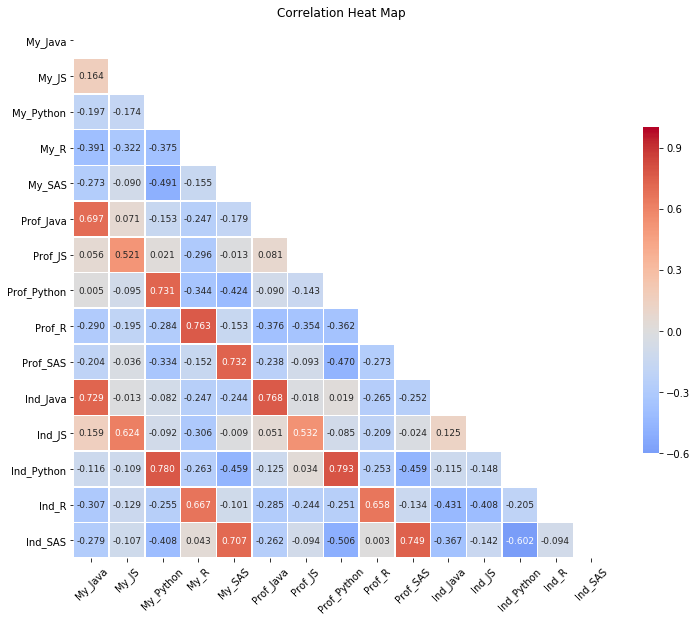

In [106]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map

corr_chart(df_corr = software_df) 

In [107]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [108]:
software_df.mean().sort_values(ascending=False)

My_R           37.125604
Prof_R         36.415459
Ind_R          32.434783
My_Python      31.304348
Prof_Python    30.028986
Ind_Python     29.772947
Ind_SAS        18.884058
Prof_SAS       18.463768
My_SAS         16.637681
Ind_Java       11.942029
My_Java        10.135266
Prof_Java       9.251208
Ind_JS          6.966184
Prof_JS         5.840580
My_JS           4.797101
dtype: float64

In [168]:
#D - Labels for Course Interest
courseint_df_labels = [
    'Python Course Interest',
    'Foundations DE Course Interest',
    'Analytics App Course Interest',
    'Systems Analysis Course Interest'
]    

#D - Creating a set of scatter plots for course interests for the four courses.
#D - Commenting this out because its not needed
#for i in range(4):
#    for j in range(4):
#        if i != j:
#            file_title = course_int_df.columns[i] + '_and_' + course_int_df.columns[j]
#            plot_title = course_int_df.columns[i] + ' and ' + course_int_df.columns[j]
#            fig, axis = plt.subplots()
#            axis.set_xlabel(courseint_df_labels[i])
#            axis.set_ylabel(courseint_df_labels[j])
#            plt.title(plot_title)
#            scatter_plot = axis.scatter(course_int_df[course_int_df.columns[i]], 
#            course_int_df[course_int_df.columns[j]],
#            facecolors = 'brown', 
#            edgecolors = 'red') 
#            plt.savefig(file_title + '.pdf', 
#                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#                orientation='portrait', papertype=None, format=None, 
#                transparent=True, pad_inches=0.25, frameon=None)

<Figure size 432x288 with 0 Axes>

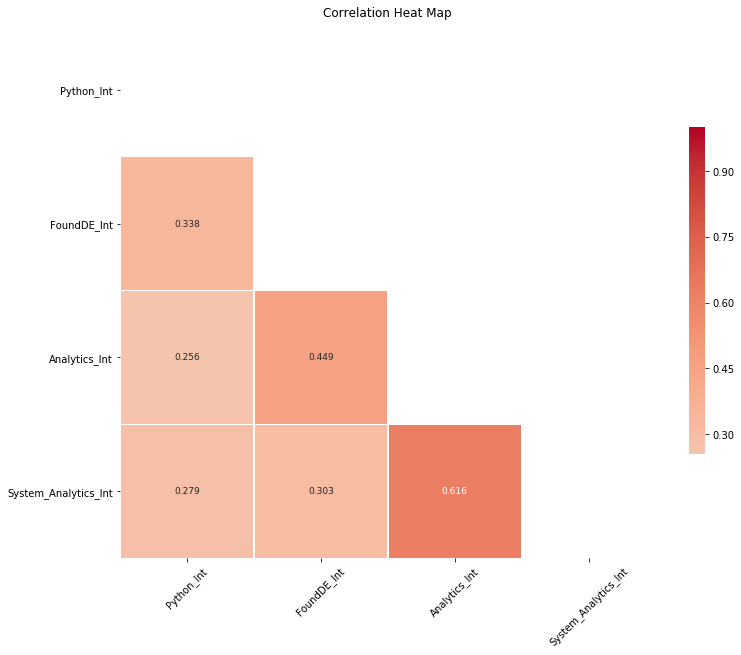

In [110]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map

corr_chart(df_corr = course_int_df)

In [111]:
#D - descriptive statistics for Course Interests
print('\nDescriptive statistics for Course Interest data ---------------')
print(course_int_df.mean().sort_values(ascending=False))


Descriptive statistics for Course Interest data ---------------
Python_Int              73.529126
FoundDE_Int             58.045000
Analytics_Int           55.201970
System_Analytics_Int    53.630000
dtype: float64


In [113]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe(include=[np.number]))


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%             NaN
50%             NaN
75%             NaN
max       12.000000
Name: Courses_Completed, dtype: float64


In [114]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
# D - This cleanup is necessary to remove noise from the data. 
# D - Responses that do not have course completed or other course related information do not 
# D - serve our purpose of finding correlations and patterns between Student Interest 
# D - and MSDS courses and thus cannot be used to predict Course design.
# D - I appended astype(int) to convert the values to integer as I was getting an error 
# D - while running the next code block.

X = survey_df['Courses_Completed'].dropna()
#.astype(int)

In [115]:
#D - I used the code below to upgrade the statsmodels because I was getting a Type error with X.
#!conda uninstall statsmodels --yes
#!conda install -c taugspurger statsmodels=0.8.0

In [116]:
# D - Checking the data type.

X.head()

RespondentID
5133300037    6.0
5132253300    4.0
5132096630    7.0
5131990362    7.0
5131860849    5.0
Name: Courses_Completed, dtype: float64

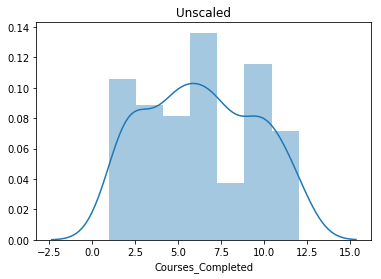

In [117]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

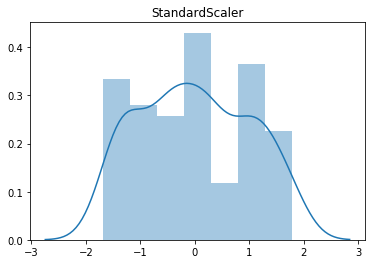

In [118]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.reshape(-1,1))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

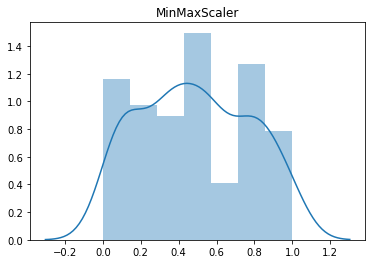

In [119]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.reshape(-1,1))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

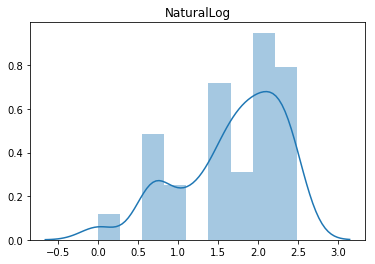

In [120]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X.reshape(-1,1))).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [131]:
#D - define subset DataFrame for analysis of courses taken
course_taken_df = survey_df.loc[:, 'PREDICT400':'Graduate_Date'].drop(survey_df[survey_df['Graduate_Date'].isnull()].index)

In [151]:
course_taken_group = course_taken_df.groupby('Graduate_Date').count()

In [157]:
course_taken_group

,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other
Graduate_Date,,,,,,,,,,,,,,,,,,,
2020 or Later,4,5,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Fall 2016,5,10,11,10,7,7,6,5,3,2,2,2,5,1,1,1,6,0,4
Fall 2017,13,13,10,6,3,12,1,0,0,0,1,0,3,0,0,1,0,0,4
Fall 2018,18,15,12,6,1,8,1,0,0,0,0,0,1,0,0,0,0,0,1
Fall 2019,3,4,3,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0
Spring 2017,12,18,19,18,9,17,12,4,2,2,1,0,8,3,1,0,0,0,0
Spring 2018,27,23,22,16,5,18,1,2,0,0,0,0,0,2,1,0,0,0,1
Spring 2019,9,6,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1
Summer 2017,12,14,14,11,6,12,6,1,1,1,3,0,2,0,1,0,1,1,5


In [164]:
#D - descriptive statistics for Course Taken
print('\nDescriptive statistics for Course Taken data ---------------')
print(course_taken_group.max().sort_values(ascending=False))


Descriptive statistics for Course Taken data ---------------
PREDICT400     27
PREDICT411     25
PREDICT410     24
PREDICT401     23
PREDICT413     20
PREDICT420     18
PREDICT422     15
PREDICT455      8
Other           6
OtherR          6
PREDICT452      6
PREDICT450      5
PREDICT453      4
PREDICT451      3
PREDICT454      3
PREDICT456      3
OtherPython     2
OtherSAS        1
PREDICT457      1
dtype: int64


In [165]:
print('\nManagement Question: Learn about current student software preferences ---------------')
print('\nBy looking at the correlation map, I think that there is a strong correlation between the choice to learn a language based on industry and professional requirements and the summary stats indicate that student preference range from high to low in the following order R, Python, SAS, Java/Scala/Spark and JavaScript.')
print('\nManagement Question: Learn about student interest in potential new courses ---------------')
print('\nBy looking at the correlation map, I think that there is a strong correlation between the interests in courses System Analysis and Analytics App. This indicates that people who take either have more chances to take the other course as well. By observing the mean summary stats, we can see that the interests range from high to low in the following order Python Course, Foundations DE Course, Analytics App Course and Systems Analysis Course.')
print('\nManagement Question: Guide software and systems planning for current and future courses ---------------')
print('\nThe mean survey stat values for all the softwares suggest that R has more industry and professional requirement. Python ranks second on this scale and SAS ranks third. So the future courses should be designed to include R and Python programming rather than SAS.')
print('\nManagement Question: Guide data science curriculum planning ---------------')
print('\nAfter looking at the value count table and max values for course taken data, I think that the interest for Predict  457, 456, 454, 451, 453 and OtherSAS has declined in recent years so they should be revised. The courses like Predict 400, 411, 410, 401, 413, 420 and 422 are more likely to be taken by students.')


Management Question: Learn about current student software preferences ---------------

By looking at the correlation map, I think that there is a strong correlation between the choice to learn a language based on industry and professional requirements and the summary stats indicate that student preference range from high to low in the following order R, Python, SAS, Java/Scala/Spark and JavaScript.

Management Question: Learn about student interest in potential new courses ---------------

By looking at the correlation map, I think that there is a strong correlation between the interests in courses System Analysis and Analytics App. This indicates that people who take either have more chances to take the other course as well. By observing the mean summary stats, we can see that the interests range from high to low in the following order Python Course, Foundations DE Course, Analytics App Course and Systems Analysis Course.

Management Question: Guide software and systems planning for 